## We are going to make a machine learning model to predict CO adsorption energy.

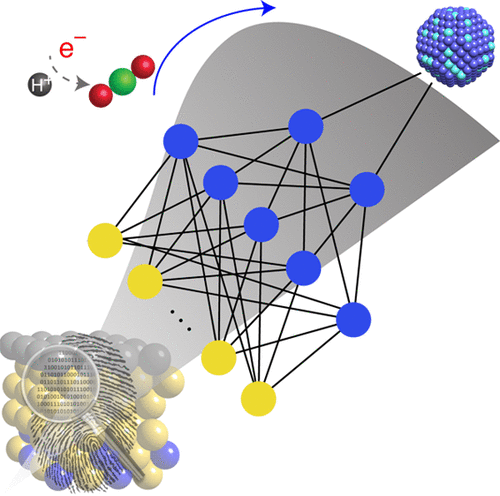

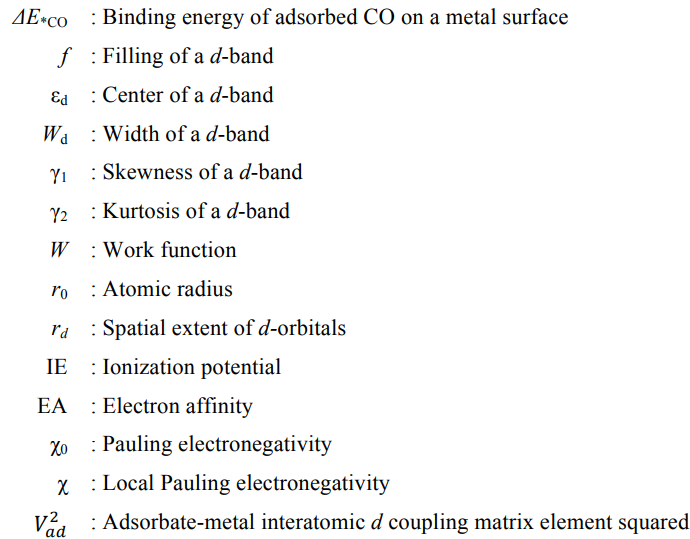

J. Phys. Chem. Lett. 2015, 6, 18, 3528–3533

In [172]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping

In [173]:
random_seed = 42

In [174]:
path='/content/CO2RR_data.csv'
data_set = read_csv(path, header=0)

features = list(data_set.columns)[:-1]
X_framed, y_framed = data_set.loc[:, features], data_set.loc[:, 'E_CO']
print('Database load successful...')

data_set

Database load successful...


,d_filling,d_center,d_width,d_skew,d_kurt,W,radius,rd,IE,EA,PEN,LPEN,Vad2,E_CO
0,0.97,-2.21,1.11,1.08,8.87,5.30,1.41,0.67,7.73,1.24,1.90,1.90,1.0,-0.69
1,0.97,-2.25,1.05,1.13,10.94,5.30,1.41,0.67,7.73,1.24,1.90,1.90,1.0,-0.63
2,0.98,-1.66,0.97,0.47,8.60,5.30,1.41,0.67,7.73,1.24,1.90,2.03,1.0,-0.86
3,0.98,-1.90,0.88,0.06,15.15,5.30,1.41,0.67,7.73,1.24,1.90,1.91,1.0,-0.74
4,0.97,-2.10,1.13,0.26,8.42,5.30,1.41,0.67,7.73,1.24,1.90,2.03,1.0,-0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.88,-2.03,1.87,0.17,3.65,6.74,1.53,1.04,9.00,2.13,2.28,2.28,3.9,-1.70
294,0.89,-1.80,1.77,0.13,4.01,6.74,1.53,1.04,9.00,2.13,2.28,2.34,3.9,-1.72
295,0.89,-1.77,1.76,-0.30,7.25,6.74,1.53,1.04,9.00,2.13,2.28,2.11,3.9,-1.56
296,0.90,-1.81,1.69,0.02,5.88,6.74,1.53,1.04,9.00,2.13,2.28,2.29,3.9,-1.43


In [175]:
X_framed

,d_filling,d_center,d_width,d_skew,d_kurt,W,radius,rd,IE,EA,PEN,LPEN,Vad2
0,0.97,-2.21,1.11,1.08,8.87,5.30,1.41,0.67,7.73,1.24,1.90,1.90,1.0
1,0.97,-2.25,1.05,1.13,10.94,5.30,1.41,0.67,7.73,1.24,1.90,1.90,1.0
2,0.98,-1.66,0.97,0.47,8.60,5.30,1.41,0.67,7.73,1.24,1.90,2.03,1.0
3,0.98,-1.90,0.88,0.06,15.15,5.30,1.41,0.67,7.73,1.24,1.90,1.91,1.0
4,0.97,-2.10,1.13,0.26,8.42,5.30,1.41,0.67,7.73,1.24,1.90,2.03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.88,-2.03,1.87,0.17,3.65,6.74,1.53,1.04,9.00,2.13,2.28,2.28,3.9
294,0.89,-1.80,1.77,0.13,4.01,6.74,1.53,1.04,9.00,2.13,2.28,2.34,3.9
295,0.89,-1.77,1.76,-0.30,7.25,6.74,1.53,1.04,9.00,2.13,2.28,2.11,3.9
296,0.90,-1.81,1.69,0.02,5.88,6.74,1.53,1.04,9.00,2.13,2.28,2.29,3.9


In [176]:
feature_names = np.array(X_framed.columns)
print(feature_names)

['d_filling' 'd_center' 'd_width' 'd_skew' 'd_kurt' 'W ' 'radius' 'rd '
 'IE ' 'EA ' 'PEN' 'LPEN' 'Vad2']


In [177]:
y_framed

,E_CO
0,-0.69
1,-0.63
2,-0.86
3,-0.74
4,-0.91
...,...
293,-1.70
294,-1.72
295,-1.56
296,-1.43


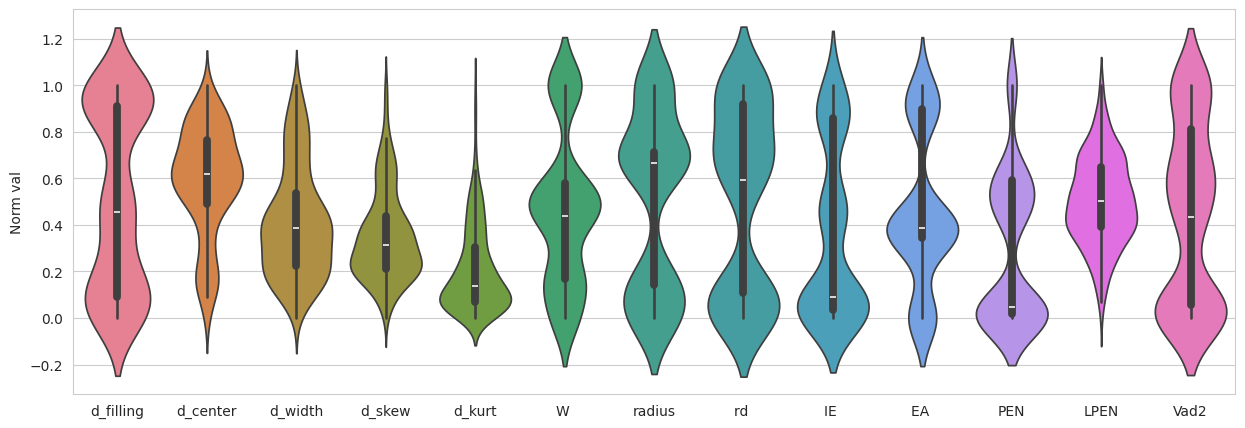

In [178]:
# max-min normalization for X
X_scaled = ((X_framed-X_framed.min())/(X_framed.max()-X_framed.min()))
X, y = X_scaled.values, y_framed.values

sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
fig = plt.ylabel('Norm val')
fig = sns.violinplot(data=X_scaled)

In [179]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(238, 13) (60, 13) (238,) (60,)


# Now, we are goint to make 3 ML regression model (Support vector machine, Random forest, Neural Network)

## 1. Support Vector Machine Model
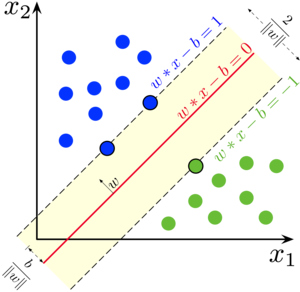

In [180]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

SVR()

In [181]:
y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Absolute Error:", mae_svr)
print("R-squared:", r2_svr)

Mean Absolute Error: 0.09016823776235147
R-squared: 0.9572628297954858


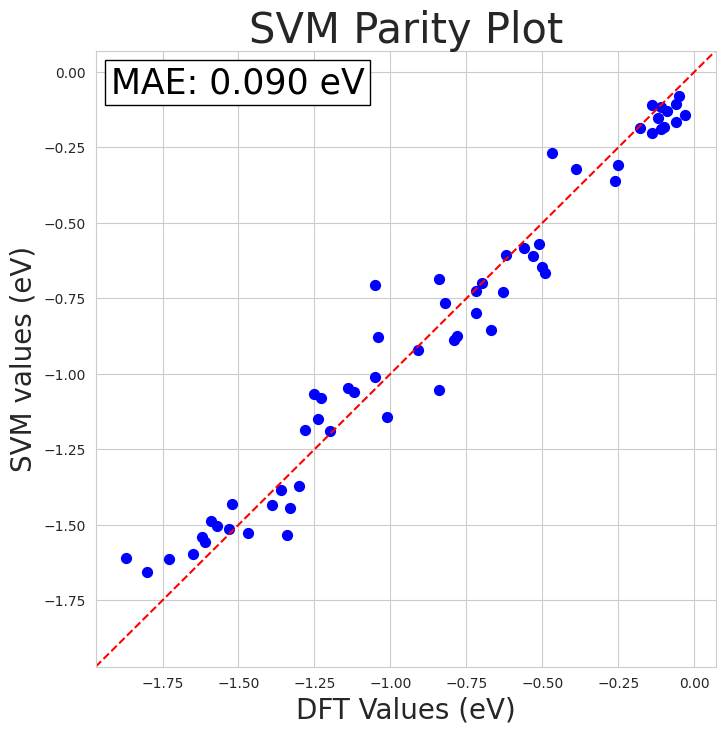

In [182]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svr, color ='b', s = 50)
plt.plot([min(y_test)-0.1, max(y_test)+0.1], [min(y_test)-0.1, max(y_test)+0.1], 'r--')
plt.xlim(min(y_test)-0.1, max(y_test)+0.1)
plt.ylim(min(y_test)-0.1, max(y_test)+0.1)
plt.xlabel('DFT Values (eV)', fontsize = 20)
plt.ylabel('SVM values (eV)', fontsize = 20)
plt.title('SVM Parity Plot', fontsize = 30)
plt.grid(True)

plt.text(min(y_test)-0.05, max(y_test)+0.05, f'MAE: {mae_svr:.3f} eV',
         fontsize=25, color='black', ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig("SVM_Parity_Plot.png", dpi=300, bbox_inches='tight')

plt.show()

# 2. Random Forest Model

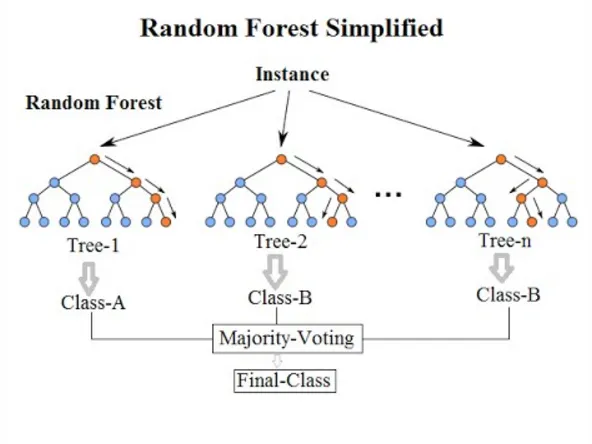

In [183]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=random_seed)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [184]:
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)

Mean Absolute Error: 0.07962166666666644
R-squared: 0.9607314908134595


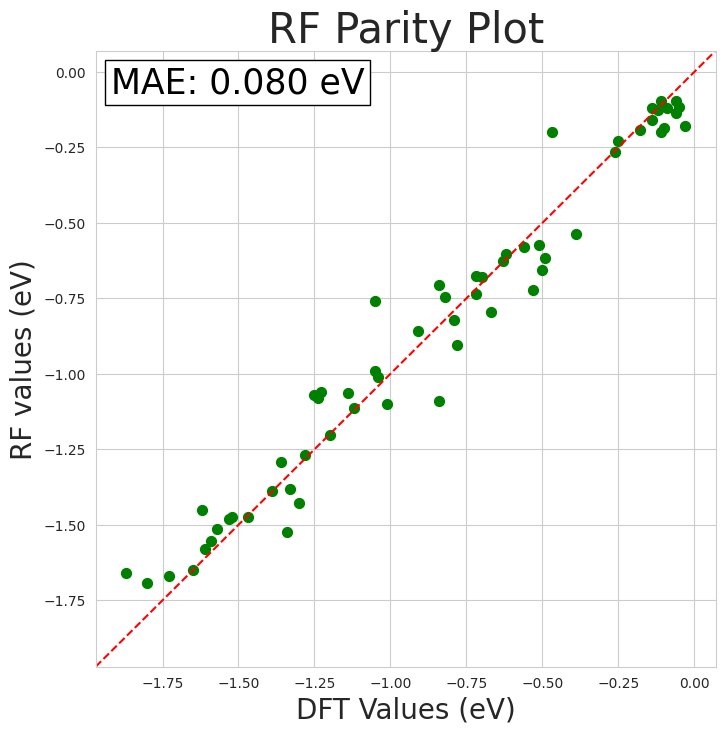

In [185]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf, color ='g', s = 50)
plt.plot([min(y_test)-0.1, max(y_test)+0.1], [min(y_test)-0.1, max(y_test)+0.1], 'r--')
plt.xlim(min(y_test)-0.1, max(y_test)+0.1)
plt.ylim(min(y_test)-0.1, max(y_test)+0.1)
plt.xlabel('DFT Values (eV)', fontsize = 20)
plt.ylabel('RF values (eV)', fontsize = 20)
plt.title('RF Parity Plot', fontsize = 30)
plt.grid(True)

plt.text(min(y_test)-0.05, max(y_test)+0.05, f'MAE: {mae_rf:.3f} eV',
         fontsize=25, color='black', ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig("RF_Parity_Plot.png", dpi=300, bbox_inches='tight')

plt.show()

# 3. Neural Network Model
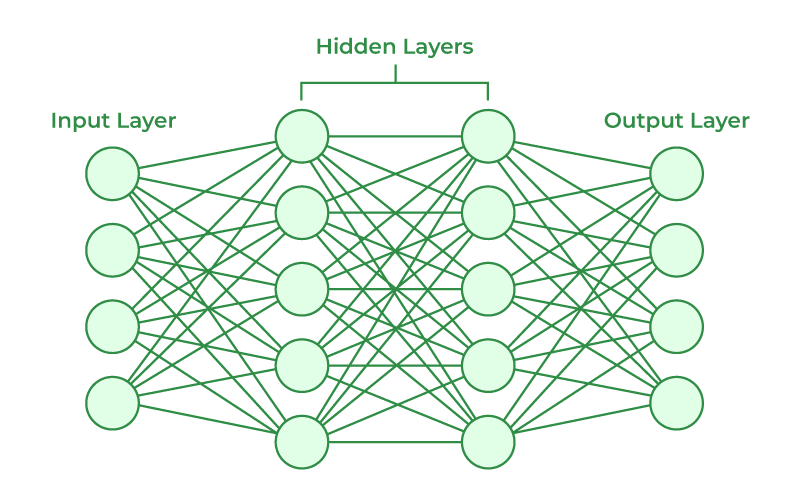

In [186]:
# hyperparameters to be optimized
activation='relu' # elu, tanh, selu, sigmoid, relu
optimizer='adam' # sgd, rmsprop, adagrad, adamax, adam
learning_rate=0.001 # 10^-N form is preferred.

unit_1 = 3
unit_2 = 3
unit_3 = 3

# hyperparameters not to be optimized
patience=10
epochs=500
batch_size=32
kernel_regularizer=None

In [187]:
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# define model
model = Sequential()
# determine the number of input features
n_features = X_train.shape[1]
# 1st layer
model.add(Dense(units=unit_1, activation=activation, kernel_initializer='he_normal',
                kernel_regularizer=kernel_regularizer,
                input_shape=(n_features,)))
# 2nd layer
model.add(Dense(units=unit_2, activation=activation, kernel_initializer='he_normal',
                    kernel_regularizer=kernel_regularizer))
# 3rd layer
model.add(Dense(units=unit_3, activation=activation, kernel_initializer='he_normal',
                    kernel_regularizer=kernel_regularizer))
# linear activation
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 3)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

In [188]:
# compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae',])
# This callback will stop the training when there is no improvement in
# the validation loss for epochs of 'patience'.
callback = EarlyStopping(monitor='val_loss',
                        patience=patience,
                        verbose=0,
                        restore_best_weights=True)

# fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs, batch_size=batch_size, callbacks=[callback],
                    verbose=1)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 1.4185 - mae: 1.0415 - val_loss: 1.0752 - val_mae: 0.8420
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2736 - mae: 0.9750 - val_loss: 0.9703 - val_mae: 0.7925
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1401 - mae: 0.9152 - val_loss: 0.8742 - val_mae: 0.7500
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0165 - mae: 0.8621 - val_loss: 0.7868 - val_mae: 0.7170
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9025 - mae: 0.8108 - val_loss: 0.7087 - val_mae: 0.6824
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7994 - mae: 0.7598 - val_loss: 0.6423 - val_mae: 0.6524
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7099 - mae: 0.7116 - val_loss: 0.5869 - val_mae: 0.6259
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6339 - mae: 0.6666 - val_loss: 0.5420 - val_mae: 0.6019
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5707 - mae: 0.6251 

In [189]:
y_pred_NN = model.predict(X_test)

mae_NN = mean_absolute_error(y_test, y_pred_NN)
r2_NN = r2_score(y_test, y_pred_NN)

print("Mean Absolute Error:", mae_NN)
print("R-squared:", r2_NN)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Mean Absolute Error: 0.0843510499397914
R-squared: 0.9590974423130987


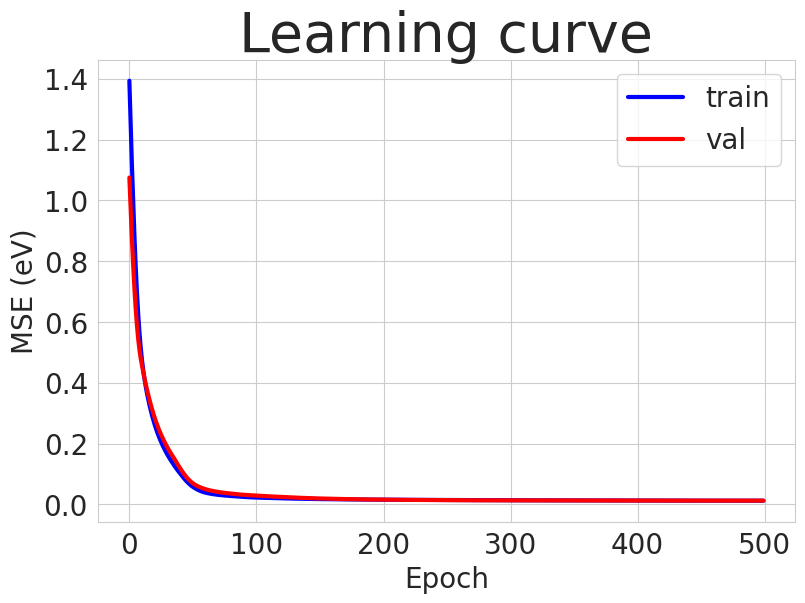

In [190]:
plt.figure(figsize=(9, 6))
plt.title('Learning curve', fontsize = 40)
plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('MSE (eV)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(history.history['loss'], label='train', color = 'b', linewidth = 3)
plt.plot(history.history['val_loss'], label='val', color = 'r', linewidth = 3)
plt.legend(fontsize = 20)
plt.show()

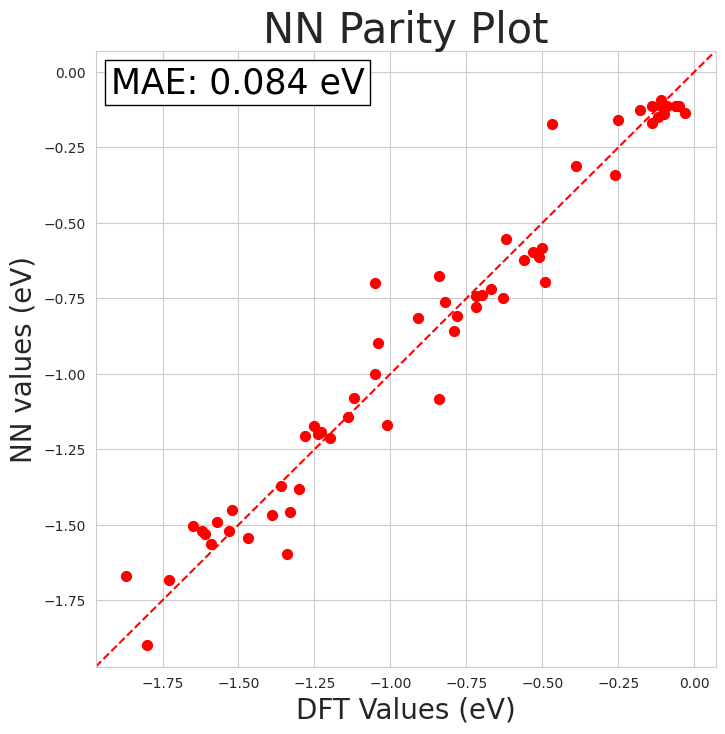

In [191]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_NN, color ='r', s = 50)
plt.plot([min(y_test)-0.1, max(y_test)+0.1], [min(y_test)-0.1, max(y_test)+0.1], 'r--')
plt.xlim(min(y_test)-0.1, max(y_test)+0.1)
plt.ylim(min(y_test)-0.1, max(y_test)+0.1)
plt.xlabel('DFT Values (eV)', fontsize = 20)
plt.ylabel('NN values (eV)', fontsize = 20)
plt.title('NN Parity Plot', fontsize = 30)
plt.grid(True)

plt.text(min(y_test)-0.05, max(y_test)+0.05, f'MAE: {mae_NN:.3f} eV',
         fontsize=25, color='black', ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig("NN_Parity_Plot.png", dpi=300, bbox_inches='tight')

plt.show()

# SVM vs RF vs NN

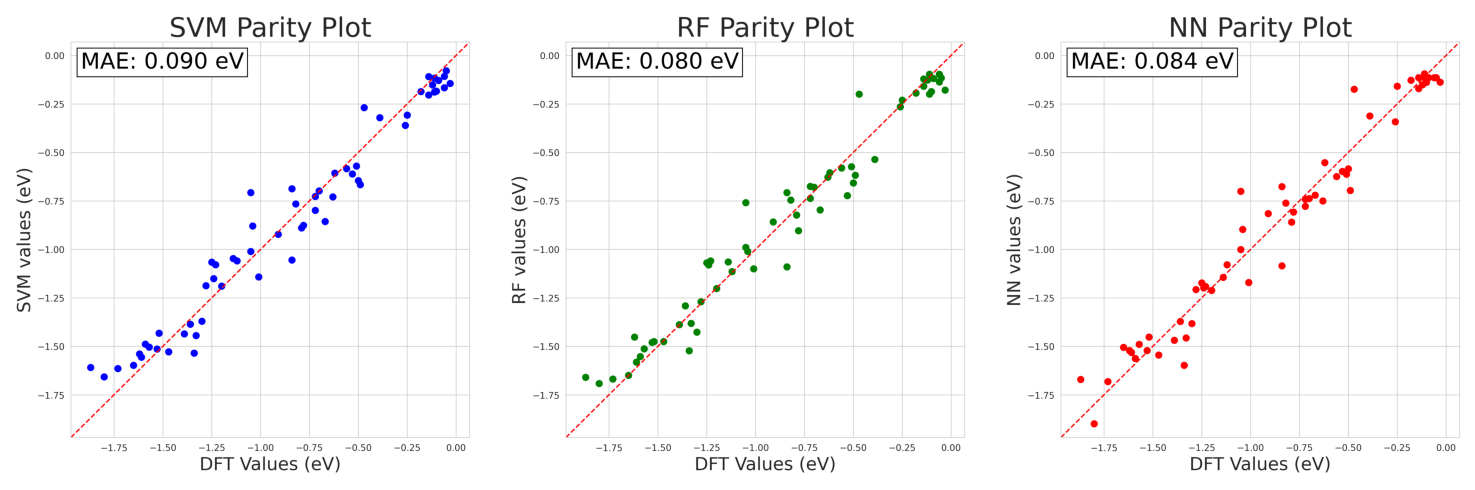

In [192]:
img_paths = ['SVM_Parity_Plot.png', 'RF_Parity_Plot.png', 'NN_Parity_Plot.png']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, img_path in enumerate(img_paths):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()

plt.savefig("All_ML_models.png", dpi=500, bbox_inches='tight')

plt.show()

# Feature Importance Analysis

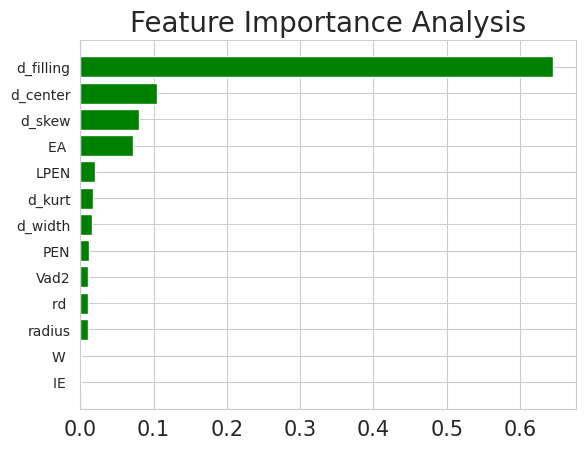

In [193]:
sort = rf_model.feature_importances_.argsort()

plt.barh(feature_names[sort], rf_model.feature_importances_[sort], color = 'g')

plt.title('Feature Importance Analysis', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.savefig('Feature_Importance.png')